**READING THE DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data mining/Bejaia Region ForestFire Dataset.csv')
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


**PREPROCESSING**

In [ ]:
#Dropping the 'day', 'month' and 'year' attributes
data=data.drop('day',axis=1)
data=data.drop('month',axis=1)
data=data.drop('year',axis=1)

In [ ]:
d=pd.DataFrame(data)

In [ ]:
#Checking for null values
d.isna().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [ ]:
#Displaying all attribute names
d.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')

In [ ]:
data['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire '],
      dtype=object)

In [ ]:
d1=data.drop(data[data['Classes  ']=='fire '].index)
d2=d1.drop(d1[d1['Classes  ']=='not fire '].index)
d3=d2.drop(d2[d2['Classes  ']=='not fire'].index)
d4=d3.drop(d3[d3['Classes  ']=='fire'].index)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


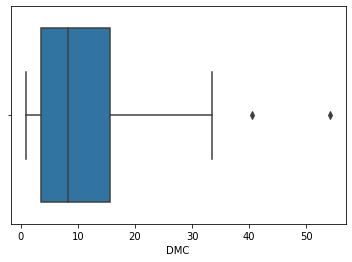

In [ ]:
#Checking for oultiers
sns.boxplot(d4['DMC'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


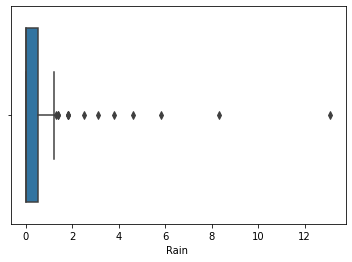

In [ ]:
sns.boxplot(d4['Rain '])

In [ ]:
# Removing the outliers

def replace_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.copy()
    non_outliers=df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outliers = ~df_out[col_name].between(fence_low, fence_high, inclusive=False)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #df_out.loc[outliers, col_name] =non_outliers.mean()
    return df_out
d5=replace_outlier(d4,' Ws')
d5=replace_outlier(d5,'Rain ')
d5=replace_outlier(d5,'FFMC')
d5=replace_outlier(d5,'DMC')
d5=replace_outlier(d5,'DC')
d5=replace_outlier(d5,'ISI')
d5=replace_outlier(d5,'BUI')
d5=replace_outlier(d5,'FWI')



q1, q3 = np.percentile(d5['FFMC'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = d5[d5['FFMC'] <lower_bound]
df1=d5[d5['FFMC'] >upper_bound]
d5



<ipython-input-12-89f05aaec3cc>:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  outliers = ~df_out[col_name].between(fence_low, fence_high, inclusive=False)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
...,...,...,...,...,...,...,...,...,...,...,...
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,not fire
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire


In [ ]:
#Converting nominal to boolean values
d5[['Classes  ']] = d5[['Classes  ']].replace(to_replace={'fire   ': 1, 'not fire   ': 0})
d5

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,0
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1


In [ ]:
# Checking for duplicate instances
d5[d5.duplicated()==True]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [ ]:
#Printing the preprocessed data
d5

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,0
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f1b27bdc0>,
      dtype=object)

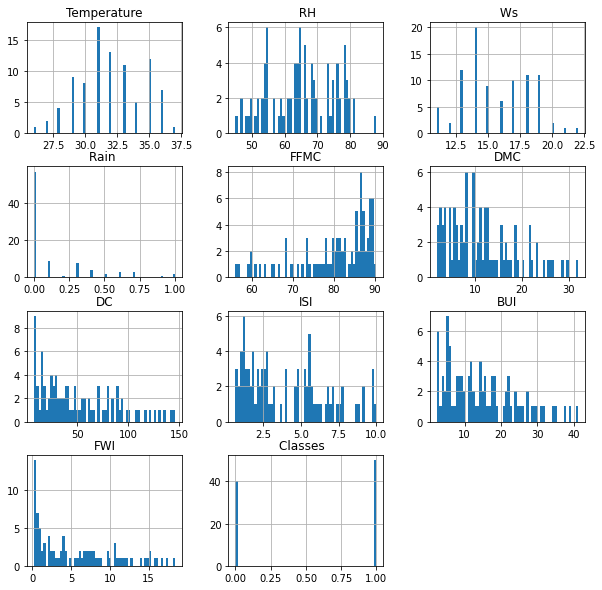

In [ ]:
# Plotting a histogram for the different attributes
d5.hist(bins = 60, figsize = (10,10))

In [ ]:
q1, q3 = np.percentile(d4['FFMC'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = d4[(d4['FFMC'] <lower_bound)
outliers=(d4['FFMC'] > upper_bound)]
outliers

SyntaxError: ignored

**CLASSIFICATION USING DECISION TREE**

In [ ]:
#Splitting the data into dependant and independant variables

x=d5[['Temperature',' RH',' Ws','Rain ','FFMC','DMC','DC','ISI','BUI','FWI']]
y=d5[['Classes  ']]

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


**DECISION TREE CLASSIFIER**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259


Accuracy: 0.9259259259259259


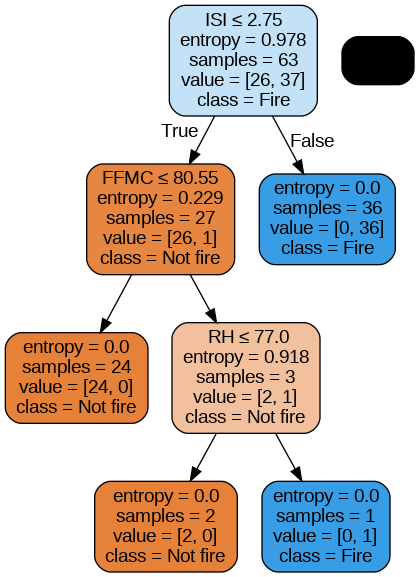

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Temperature',' RH',' Ws','Rain ','FFMC','DMC','DC','ISI','BUI','FWI'],class_names={0:'Not fire',1:'Fire'})
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('ForestFire.png')
Image(graph.create_png())

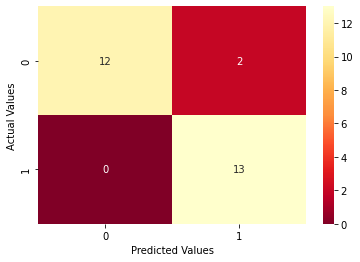

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap = 'YlOrRd_r')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**LOGISTIC Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression (solver = "liblinear")

logreg.fit (x_train , y_train)
y_pred = logreg.predict(x_test)
y_predicted_proba = logreg.predict_proba(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9629629629629629


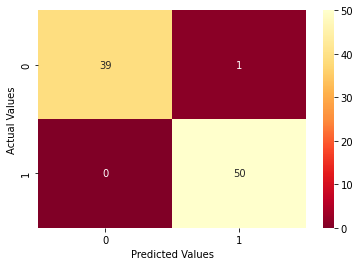

In [ ]:
print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))

cm = confusion_matrix(y,logreg.predict(x))
sns.heatmap(cm, annot= True, cmap = 'YlOrRd_r',fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
print (classification_report (y , logreg.predict (x)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        50

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



**Random Forest Decision Tree**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

<ipython-input-25-05418e0c41d6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy = round(accuracy_score(y_test,y_pred)*100)
print(f"Accuracy: {accuracy}")

Accuracy: 93


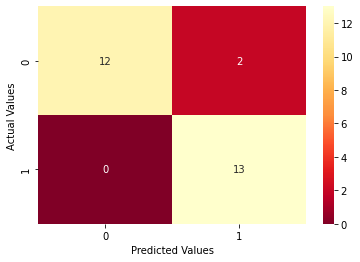

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap = 'YlOrRd_r')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
x_test.shape

(27, 10)

**SVM CLASSIFICATION**

In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_test = svm.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.83      0.91        18

    accuracy                           0.89        27
   macro avg       0.88      0.92      0.88        27
weighted avg       0.92      0.89      0.89        27

Accuracy of our model is 88.89

Confusion matrix:


array([[ 9,  0],
       [ 3, 15]])

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.78      0.88        18

    accuracy                           0.85        27
   macro avg       0.85      0.89      0.85        27
weighted avg       0.90      0.85      0.86        27

Accuracy of our model is 85.19

Confusion matrix:


array([[ 9,  0],
       [ 4, 14]])

**NEURAL NETWORK**

In [ ]:
# Neural network

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
model = keras.Sequential([
    keras.layers.Dense(30,input_shape=(10,),activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
y_pred = (model.predict(x_test) > 0.5)
acc1=history.history['accuracy']
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 90ms/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 79ms/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 75ms/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 0s 131ms/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 0s 193ms/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 194ms/step - loss: 0.4127 - accuracy: 0.5873 - val_loss: 0.3333 - val_accuracy: 0.6667
Epoch 8/20
1/1 [==========

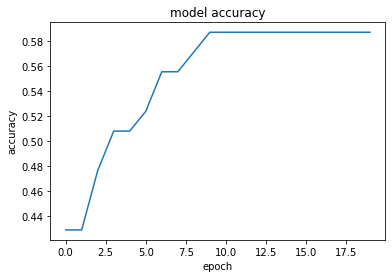

In [ ]:
plt.plot(acc1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()